In [2]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

variables como objetivo: “tiempo de interacción”, “botón correcto” “color presionado” y “dificultad” ,

In [3]:
df = pd.read_csv('Erick Osvaldo.csv')
#Eliminamos la columna de fecha
df1 = df.copy()
df1 = df1.drop(columns=['fecha', 'administrador', 'usuario', 'juego'])
df1.head()

,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,auto push,tiempo de lección,tiempo de sesión
0,1,0.000000,5,1,4,1,1,0.0,0.0
1,1,6.366849,5,2,4,1,1,0.0,0.0
2,1,12.051060,5,3,4,1,1,0.0,0.0
3,1,17.201320,5,4,4,1,1,0.0,0.0
4,1,19.867560,5,5,4,1,1,0.0,0.0


***Correlación***

In [9]:
corr_FactorsEO = df1.corr()
corr_FactorsEO

,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,auto push,tiempo de lección,tiempo de sesión
presionó botón correcto,1.000000,0.704634,-0.090289,-0.382233,0.309919,0.332413,0.603290,0.326378,0.681284
tiempo de interacción,0.704634,1.000000,0.005848,-0.384249,0.575176,0.132325,0.769989,0.463142,0.966768
mini juego,-0.090289,0.005848,1.000000,0.230948,-0.016448,0.060044,-0.000136,0.212513,-0.046137
número de interacción por lección,-0.382233,-0.384249,0.230948,1.000000,-0.334292,-0.385648,-0.133348,-0.181478,-0.378819
color presionado,0.309919,0.575176,-0.016448,-0.334292,1.000000,0.017594,0.370077,0.267938,0.559297
dificultad,0.332413,0.132325,0.060044,-0.385648,0.017594,1.000000,0.038135,0.222467,0.087092
auto push,0.603290,0.769989,-0.000136,-0.133348,0.370077,0.038135,1.000000,0.352847,0.736537
tiempo de lección,0.326378,0.463142,0.212513,-0.181478,0.267938,0.222467,0.352847,1.000000,0.224598
tiempo de sesión,0.681284,0.966768,-0.046137,-0.378819,0.559297,0.087092,0.736537,0.224598,1.000000


In [10]:
corr_FactorsEO= abs(corr_FactorsEO)
corr_FactorsEO

,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,auto push,tiempo de lección,tiempo de sesión
presionó botón correcto,1.000000,0.704634,0.090289,0.382233,0.309919,0.332413,0.603290,0.326378,0.681284
tiempo de interacción,0.704634,1.000000,0.005848,0.384249,0.575176,0.132325,0.769989,0.463142,0.966768
mini juego,0.090289,0.005848,1.000000,0.230948,0.016448,0.060044,0.000136,0.212513,0.046137
número de interacción por lección,0.382233,0.384249,0.230948,1.000000,0.334292,0.385648,0.133348,0.181478,0.378819
color presionado,0.309919,0.575176,0.016448,0.334292,1.000000,0.017594,0.370077,0.267938,0.559297
dificultad,0.332413,0.132325,0.060044,0.385648,0.017594,1.000000,0.038135,0.222467,0.087092
auto push,0.603290,0.769989,0.000136,0.133348,0.370077,0.038135,1.000000,0.352847,0.736537
tiempo de lección,0.326378,0.463142,0.212513,0.181478,0.267938,0.222467,0.352847,1.000000,0.224598
tiempo de sesión,0.681284,0.966768,0.046137,0.378819,0.559297,0.087092,0.736537,0.224598,1.000000


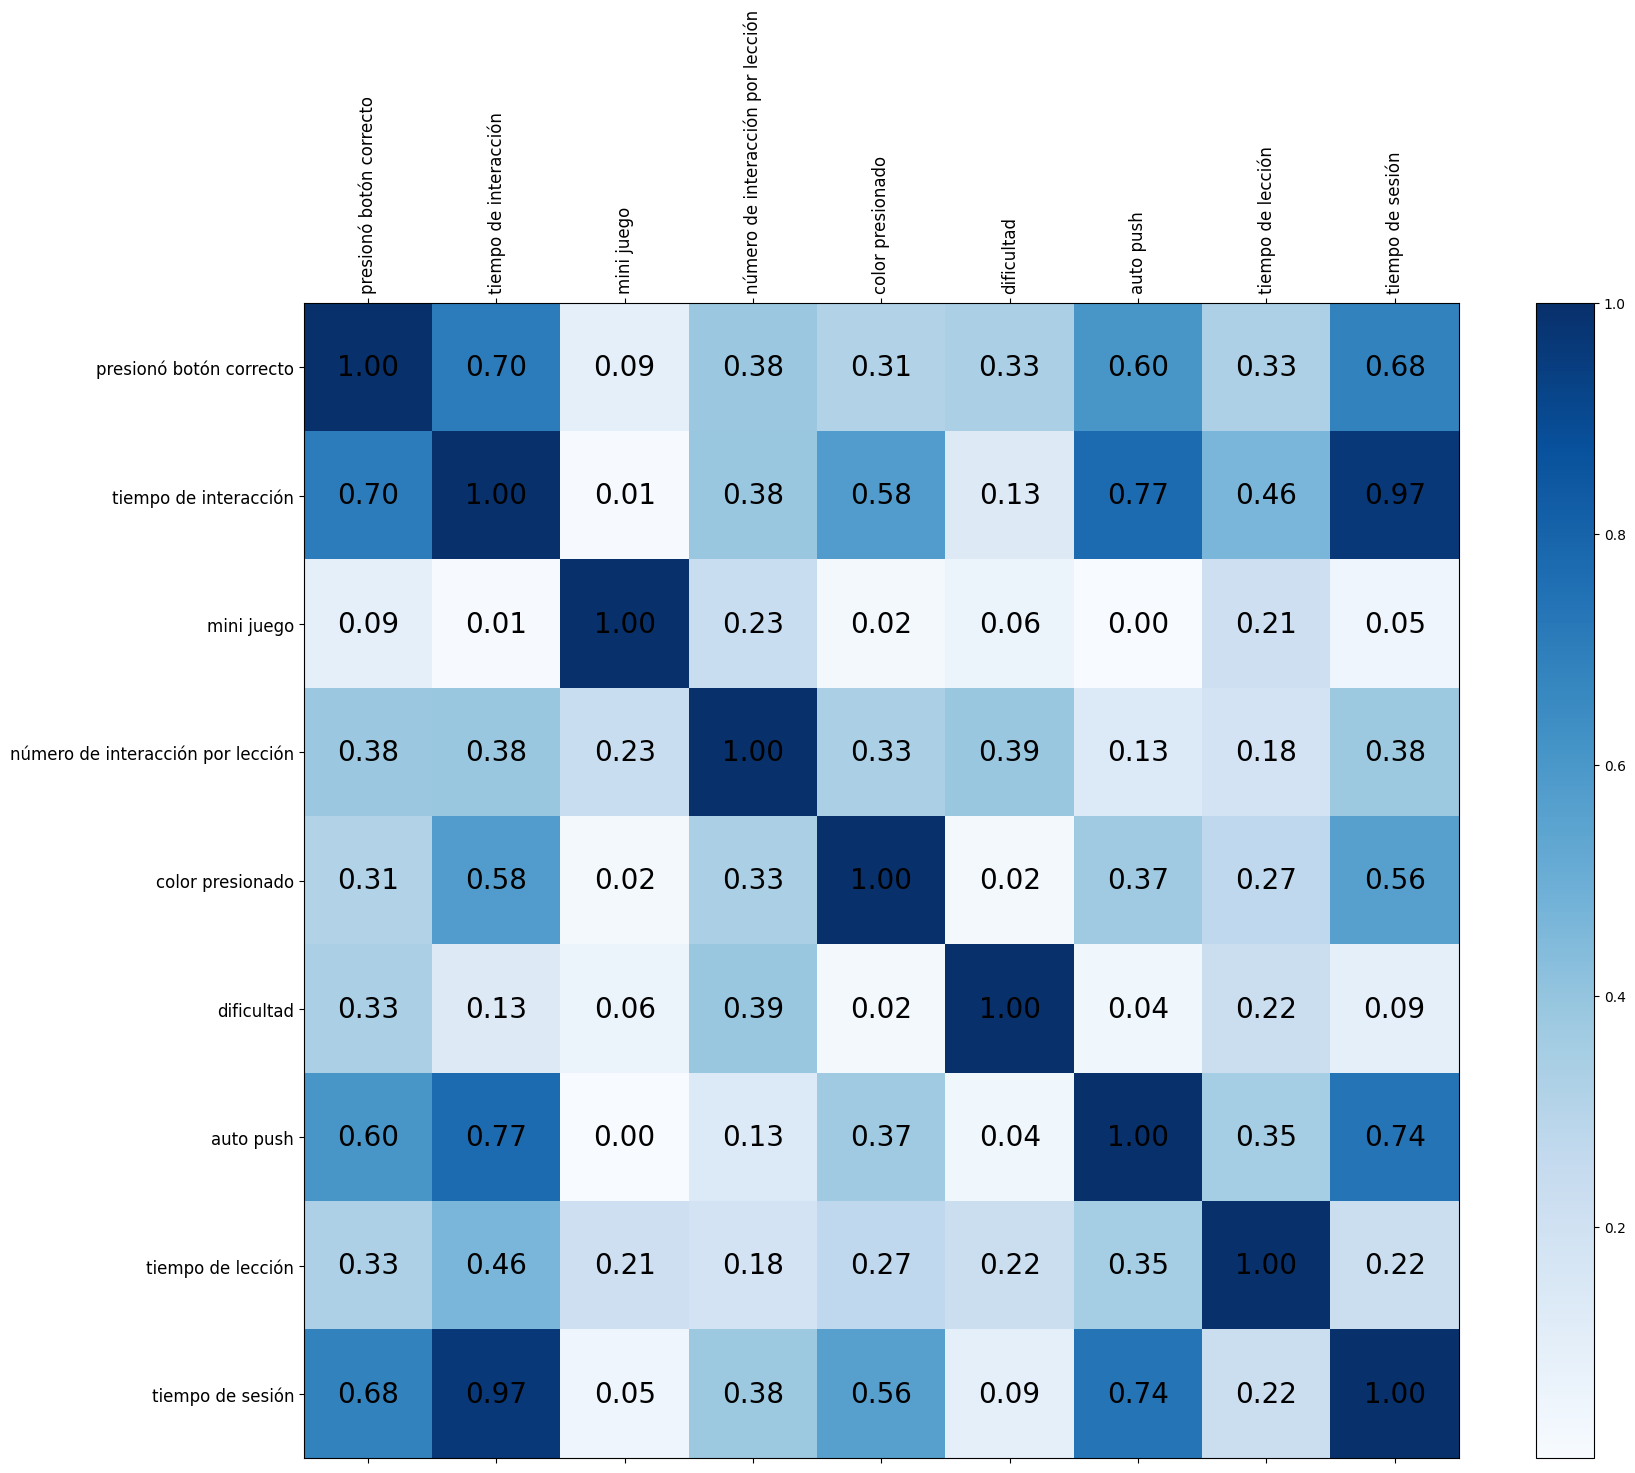

In [11]:
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(corr_FactorsEO, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_FactorsEO.shape[0]):
    for j in range(corr_FactorsEO.shape[1]):
        ax.text(j, i, f"{corr_FactorsEO.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_FactorsEO.columns)), corr_FactorsEO.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_FactorsEO.index)), corr_FactorsEO.index, fontsize=12)
plt.show()

***Modelos no lineales para Erick Osvaldo***

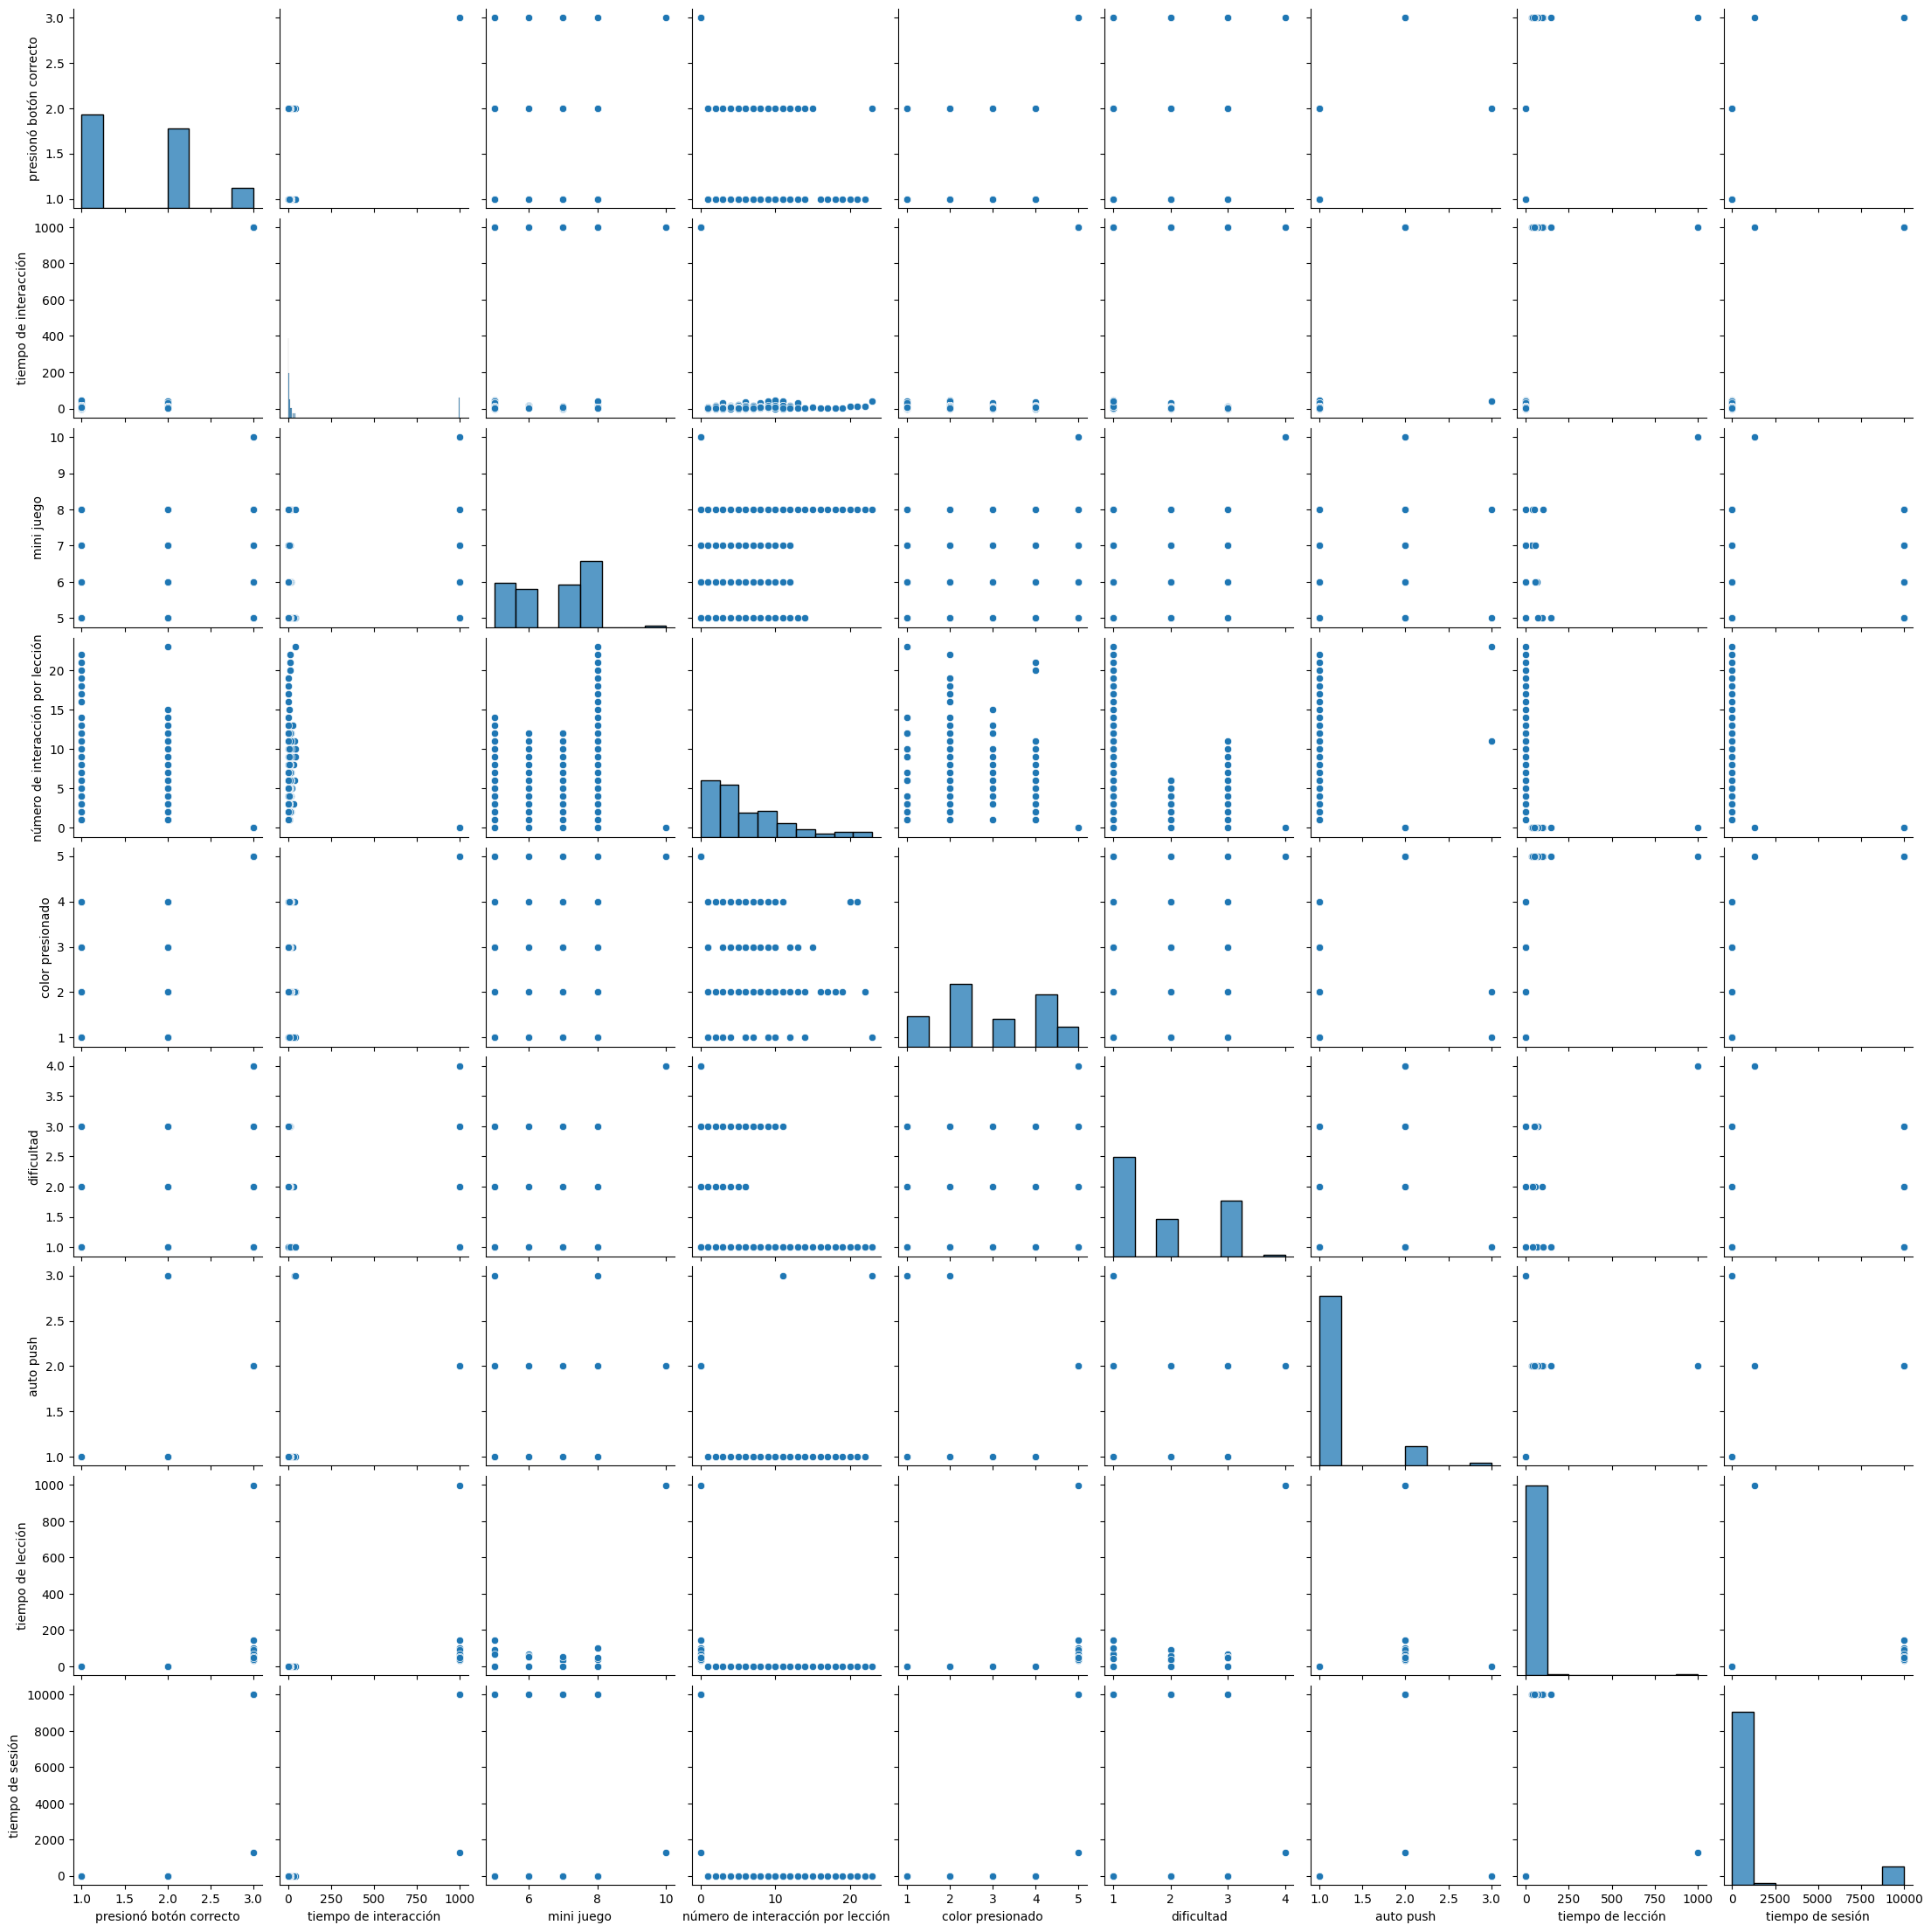

In [12]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df1)

#### Modelo 1 (tiempo de interacción)

In [26]:
#Eliminamos los datos nulos de la coumna
EO = df1[df1['presionó botón correcto'] < 3]

In [18]:
EO

,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,auto push,tiempo de lección,tiempo de sesión
0,1,0.000000,5,1,4,1,1,0.0,0.0
1,1,6.366849,5,2,4,1,1,0.0,0.0
2,1,12.051060,5,3,4,1,1,0.0,0.0
3,1,17.201320,5,4,4,1,1,0.0,0.0
4,1,19.867560,5,5,4,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...
119,1,3.583350,8,7,2,3,1,0.0,0.0
120,1,5.200340,8,8,2,3,1,0.0,0.0
121,1,7.200247,8,9,4,3,1,0.0,0.0
122,2,8.900373,8,10,1,3,1,0.0,0.0


In [19]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= EO[['presionó botón correcto']]
Var_Dep= EO['tiempo de interacción']

In [20]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [21]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [22]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, EO['presionó botón correcto'], EO['tiempo de interacción'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([ -58.44917089,  175.84817087, -109.33669112])

In [23]:
# Predicciones
y_pred1 = func1(x, *parametros1)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1.head()

,presionó botón correcto
0,8.062309
1,8.062309
2,8.062309
3,8.062309
4,8.062309


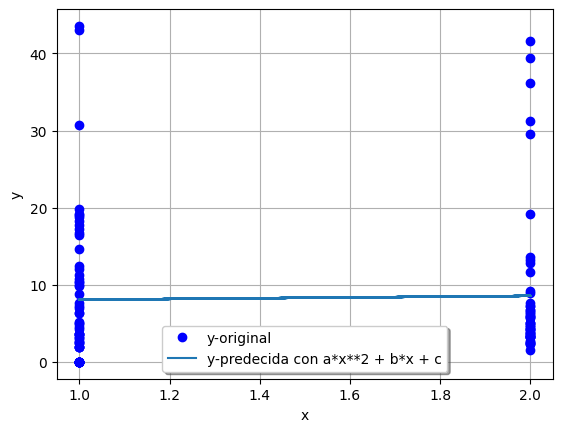

In [24]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [27]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
R2_Modelo1 

0.0006919779420837546

In [28]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.026305473614511386)

Esto significa que no son dependientes una de la otra en absoluto

## Modelo 2 (presionó botón correcto)

In [90]:
EO = df1[df1['auto push'] != 0]

In [99]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= EO[['auto push']]
Var_Dep= df1['presionó botón correcto']

In [100]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [101]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [102]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, EO['presionó botón correcto'], EO['auto push'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([ 0.42307692, -1.19230769,  1.76923077])

In [103]:
# Predicciones
y_pred1 = func1(x, *parametros1)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1.head()

,auto push
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


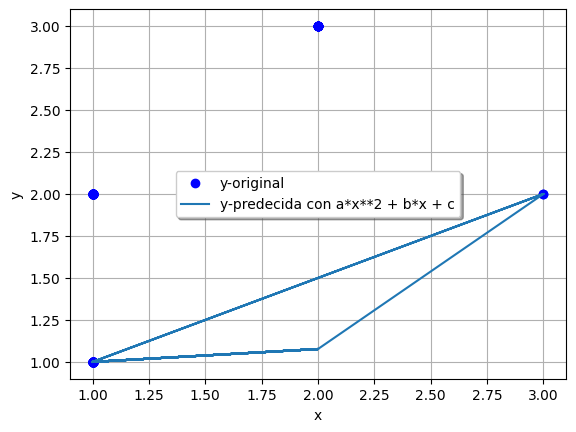

In [104]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [97]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
R2_Modelo1 

C:\Users\italy\AppData\Local\Temp\ipykernel_20312\3582695773.py:4: RuntimeWarning: invalid value encountered in sqrt
  R = np.sqrt(R2_Modelo1)


-0.7603550295857975

In [105]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

C:\Users\italy\AppData\Local\Temp\ipykernel_20312\563892453.py:2: RuntimeWarning: invalid value encountered in sqrt
  R = np.sqrt(R2_Modelo1)


np.float64(nan)

## Modelo 3 (color presionado)

In [80]:
#Eliminamos los datos nulos de la coumna
EO = df1[df1['color presionado'] != 5]
EO = df1[df1['tiempo de interacción'] != 999.0]

In [81]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= EO[['tiempo de interacción']]
Var_Dep= EO['color presionado']

In [82]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [83]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [85]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, EO['tiempo de interacción'], EO['color presionado'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([-1.81220789e-04, -6.79365595e-03,  2.66917792e+00])

In [86]:
# Predicciones
y_pred1 = func1(x, *parametros1)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1.head()

,tiempo de interacción
0,2.669178
1,2.618578
2,2.560989
3,2.498697
4,2.462673


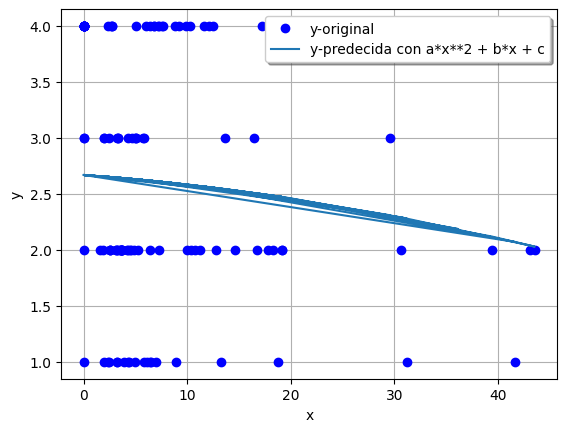

In [87]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [88]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
R2_Modelo1 

0.01399528075607015

In [89]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.11830165153568292)

## Modelo 4 (dificultad)

De esta coolumna no es necesario borrar los datos porque no sabemos con exactitud que datos son los nulos

In [108]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df1['tiempo de lección']
Var_Dep= df1['dificultad']

In [109]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [110]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [111]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df1['presionó botón correcto'], df1['tiempo de lección'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([  69.08061969, -207.24186049,  138.16124145])

In [112]:
# Predicciones
y_pred1 = func1(x, *parametros1)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1.head()

0    138.161241
1    138.161241
2    138.161241
3    138.161241
4    138.161241
Name: tiempo de lección, dtype: float64

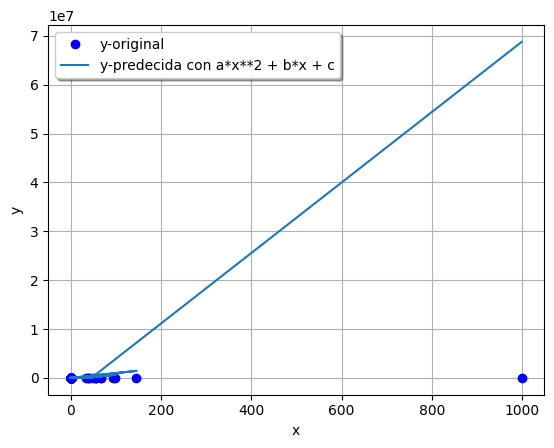

In [113]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [114]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
R2_Modelo1 

C:\Users\italy\AppData\Local\Temp\ipykernel_20312\3582695773.py:4: RuntimeWarning: invalid value encountered in sqrt
  R = np.sqrt(R2_Modelo1)


-47651848397434.55

In [115]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

C:\Users\italy\AppData\Local\Temp\ipykernel_20312\563892453.py:2: RuntimeWarning: invalid value encountered in sqrt
  R = np.sqrt(R2_Modelo1)


np.float64(nan)